### Fitting the an Exponential Pulse to find out the pulse duration
The exponential pulse is described as 

$$ \psi(t)=\frac{t}{t_p^2}e^{-t/t_p},$$ 
(Jozef Gembarovic, "Flash Method Data Reduction Using ODRPACK")

1. Generate a simulated, under-sampled pulse with some random noise.
2. Fit the pulse with the model and find out the original pulse duration.

#### Simulated pulse

Theoretical pulse duration: 0.0002  ; detected:  0.000227272727273


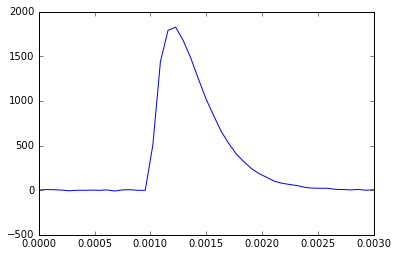

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
noise = 1e-3 # relative to max

def exponential_pulse(params, t):
    """Build an exponential pulse signal from time array `t`"""
    zero_time, pulse_maximum = params 
    t1 = t-zero_time
    signal = t1*np.exp(-t1/pulse_maximum)
    signal = signal/(pulse_maximum**2)
    # Zero anything before zero_time
    signal[t1<=0] = 0.
    return signal

pulse_maximum = 0.0002 #(tp)
sampling_rate = 15000.

zero_time = pulse_maximum*5
signal_duration = zero_time+pulse_maximum*10
num_points = sampling_rate*signal_duration

t = np.linspace(0, signal_duration, num_points)

signal = exponential_pulse([zero_time, pulse_maximum], t)
noise = np.random.normal(0, noise/pulse_maximum, len(signal))
signal += noise

undersampled_max = t[np.where(signal==max(signal))[0][0]]-zero_time
print ('Theoretical pulse maximum:',pulse_maximum,' ; detected: ',undersampled_max)
pyplot.plot(t, signal)
pyplot.show()

#### Fitting the simulated pulse

Beta: [ 0.00099997  0.00020016]
Beta Std Error: [  2.56640886e-07   2.77362838e-07]
Beta Covariance: [[  6.25488986e-14  -3.36926187e-14]
 [ -3.36926187e-14   7.30574519e-14]]
Residual Variance: 1.0530088587296216
Inverse Condition #: 0.09604958935726667
Reason(s) for Halting:
  Sum of squares convergence


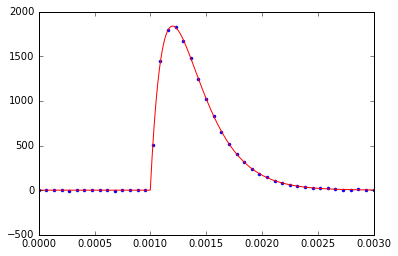

Fitted pulse duration: 0.000200163025562 Theoretical: 0.0002
Fitted zero time: 0.000999971047615 Theoretical: 0.001


In [6]:
import scipy.odr.odrpack as odrpack
import os
filename='pulse_odr.log'
if os.path.exists(filename):
    os.remove(filename)
    
model = odrpack.Model(exponential_pulse)
data = odrpack.RealData(t, signal, sx=0.1/sampling_rate, sy=0.001/pulse_maximum)
odrobj = odrpack.ODR(data, model, beta0=[0., 0.0005], job=3, 
                    iprint=6616, ifixb=[1, 1], rptfile=filename)             
                                                    
output = odrobj.run() 
output.pprint() 

th_time=np.linspace(0, signal_duration, num_points*100)
fitted_zero_time, fitted_max = output.beta
pyplot.plot(t, signal,"b.")
pyplot.plot(th_time, exponential_pulse([fitted_zero_time, fitted_max], th_time),"r")
pyplot.show()
print ('Fitted pulse maximum:', fitted_max, 'Theoretical:', pulse_maximum)
print ('Fitted zero time:', fitted_zero_time, 'Theoretical:', zero_time)
